In [49]:
import numpy as np
from matplotlib import rc
import matplotlib
import matplotlib.pyplot as plt
import os 
from mpl_toolkits.axes_grid1 import make_axes_locatable
import h5py
from matplotlib.colors import ListedColormap
from matplotlib import gridspec
%matplotlib inline

cmap = 'inferno'

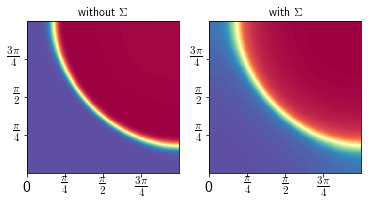

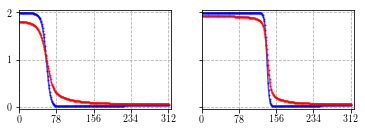

In [46]:
def pltgrid(kx,ky,arrangment,location):
    ax = plt.subplot(location)
    ax.scatter(kx,ky,marker = 'o', s=10.0, alpha= 1.0,edgecolor = 'black',c='none')
    ax.set_xlim(0,np.pi)
    ax.set_ylim(0,np.pi)
    
def subFermi (namefile, arrangment, location,  title, xtw =True , ytw =True, bar = False   ): 
    if type(arrangment) is not tuple: 
        print "location must be a tuple"
        return     
    cmap = 'Spectral'
    # Choose colormap
    smap = plt.cm.Spectral
    # Get the colormap colors
    my_cmap = smap(np.arange(smap.N))
    my_cmap[:,-1] = np.linspace(0, 0.1, smap.N)
    my_cmap = ListedColormap(my_cmap)
    cmap = plt.cm.Spectral
    ax = plt.subplot(location)
    matriciona = np.loadtxt(namefile, comments ='#')
    im= ax.pcolormesh ( np.arange(0.,np.pi,np.pi/matriciona.shape[0]),np.arange(0.,np.pi,np.pi/matriciona.shape[0]), matriciona,cmap=cmap)
    plt.title(title)
    divider = make_axes_locatable(ax)
    if bar: 
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)
        #plt.colorbar(im, ax=ax, shrink=0.52)
    ax.set_aspect(1) 
    ax.set_xlim(0,np.pi)
    ax.set_ylim(0,np.pi)
    ax.set_xticks(np.arange(0.,np.pi,np.pi/4))
    ax.set_yticks(np.arange(np.pi/4,np.pi,np.pi/4))
    if xtw : 
        ax.set_xticklabels([r'0',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$'],fontsize =16)
    if ytw : 
        ax.set_yticklabels([r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$'],fontsize =16)
    return im, divider

def subCutFermi(location1,location2):
    fig = plt.figure()

    ax1 = fig.add_subplot(location1)
    mar = 'o'
    ms = 1.0
    fs = 16
    matricionaN = np.loadtxt('../data/Fermi_occupation_NOSE_fill0_975.txt', comments ='#')
    matricionaS = np.loadtxt('../data/Fermi_occupation_SE_fill0_975.txt', comments='#')
    ax1.set_xticks(np.arange(0,matricionaN.shape[0],matricionaN.shape[0]/4))
    #ax1.set_xticklabels([r'$(0,0)$',r'$(\frac{\pi}{4},\frac{\pi}{4})$',r'$(\frac{\pi}{2},\frac{\pi}{2})$',r'$(\frac{3\pi}{4},\frac{3\pi}{4})$',r'$(\pi,\pi)$'],fontsize = fs)
    ax1.set_yticklabels([])
    #plot lungo uno degli assi
    ax1.plot([matricionaN[i,i] for  i in range(matricionaN.shape[0])],'-', marker = mar, markersize=ms, c ='blue',alpha = 0.7)
    ax1.plot([matricionaS[i,i] for  i in range(matricionaS.shape[0])],'-', marker = mar, markersize=ms,  c ='red',alpha =0.7)

    ax1.set_xlim([0,matricionaN.shape[0]+5])
    ax2 = fig.add_subplot(location2)
    ax2.set_xlim([0,matricionaN.shape[0]+5])
    ax2.plot([matricionaN[-1,i] for  i in range(matricionaN.shape[0])],'-', marker = mar, markersize=ms,  c ='blue',alpha=0.7)
    ax2.plot([matricionaS[-1,i] for  i in range(matricionaS.shape[0])],'-', marker = mar, markersize=ms, c ='red',alpha=0.7)

    ax2.set_xticks(np.arange(0,matricionaN.shape[0],matricionaN.shape[0]/4))
    #ax2.set_xticklabels([r'$(\pi,0)$',r'$(\pi,\frac{\pi}{4})$',r'$(\pi,\frac{\pi}{2})$',r'$(\pi,\frac{3\pi}{4})$',r'$(\pi,\pi)$'],fontsize = fs)
    ax1.set_ylim([-0.05,2.05])
    ax2.set_ylim([-0.05,2.05])
    ax1.grid(linestyle='dashed')
    ax2.grid(linestyle='dashed')
    #ax2.set_ylabel(r'$\mathrm{occupation}$',fontsize=fs+6)

im,divider = subFermi('../data/Fermi_occupation_NOSE_fill0_975.txt',(1,2,2),121,r'without $\Sigma$',bar=False)
im,divider = subFermi('../data/Fermi_occupation_SE_fill0_975.txt',(1,2,2),122,r'with $\Sigma$')
#pltgrid(kx,ky,(1,2,1),121)
#pltgrid(kx,ky,(1,2,1),122)
bbox = plt.gcf().get_window_extent().transformed(plt.gcf().dpi_scale_trans.inverted())
width, height = bbox.width, bbox.height

#The first two numbers give the location, x,y. The last two numbers fix the aspec ratio 
#scale = 1.0
#cbar_ax = plt.gcf().add_axes([1.0, 0.15, scale*0.05, scale*height/width])
#plt.colorbar(im, cax=cbar_ax)
#plt.tight_layout()

# Add cuts
subCutFermi(222,221)


namefig = '../images/jup_wannasee.png'
plt.savefig(namefig,dpi=300 )


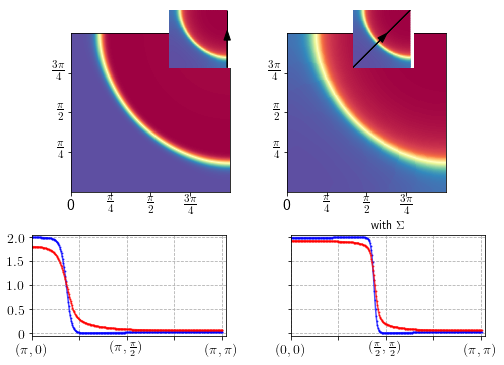

In [96]:
def forceAspect(ax,aspect=1):
    im = ax.get_images()
    extent =  im.get_extent()
    ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)

def addFermi (namefile, ax,  title, xtw =True , ytw =True, bar = False   ): 
    
    cmap = 'Spectral'
    # Choose colormap
    smap = plt.cm.Spectral
    # Get the colormap colors
    my_cmap = smap(np.arange(smap.N))
    my_cmap[:,-1] = np.linspace(0, 0.1, smap.N)
    my_cmap = ListedColormap(my_cmap)
    cmap = plt.cm.Spectral
    #ax = plt.subplot(location)
    matriciona = np.loadtxt(namefile, comments ='#')
    im= ax.pcolormesh ( np.arange(0.,np.pi,np.pi/matriciona.shape[0]),np.arange(0.,np.pi,np.pi/matriciona.shape[0]), matriciona,cmap=cmap)
    plt.title(title)
    divider = make_axes_locatable(ax)
    if bar: 
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)
        #plt.colorbar(im, ax=ax, shrink=0.52)
    ax.set_aspect(1) 
    ax.set_xlim(0,np.pi)
    ax.set_ylim(0,np.pi)
    ax.set_xticks(np.arange(0.,np.pi,np.pi/4))
    ax.set_yticks(np.arange(np.pi/4,np.pi,np.pi/4))
    if xtw : 
        ax.set_xticklabels([r'0',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$'],fontsize =16)
    if ytw : 
        ax.set_yticklabels([r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$'],fontsize =16)
    return im, divider

    
def subFermi (namefile, ax,  title=None, xtw =True , ytw =True, bar = False   ):    
    cmap = 'jet'
 # Choose colormap
    smap = plt.cm.Spectral
    # Get the colormap colors
    my_cmap = smap(np.arange(smap.N))
    my_cmap[:,-1] = np.linspace(0.1, 0.3, smap.N)
    my_cmap = ListedColormap(my_cmap)
    
    matriciona = np.loadtxt(namefile, comments ='#')
   
    #[i.set_linestyle('dashed') for i in ax.spines.itervalues()]
    [i.set_visible(False) for i in ax.spines.itervalues()]
    [i.set_linewidth(0.3) for i in ax.spines.itervalues()]

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    im= ax.pcolormesh ( np.arange(0.,np.pi,np.pi/matriciona.shape[0]),np.arange(0.,np.pi,np.pi/matriciona.shape[0]),matriciona,cmap=my_cmap)     
    ax.set_aspect(1) 
    ax.set_xlim([0.,np.pi+0.2])

def subCutFermi(ax2,ax1):

    #fig = plt.gcf()
    #ax2 = plt.axes([0.,0.,figsize[0]*0.5,figsize[1]*0.5])
    #ax1 = plt.axes([figsize[0]*0.5,0.,figsize[0]*0.5,figsize[1]*0.5])
    mar = 'o'
    ms = 1.0
    fs = 14

    matricionaN = np.loadtxt('../data/Fermi_occupation_NOSE_fill0_975.txt', comments ='#')
    matricionaS = np.loadtxt('../data/Fermi_occupation_SE_fill0_975.txt', comments='#')
    ax1.set_xticks(np.arange(0,matricionaN.shape[0],matricionaN.shape[0]/4))
    ax1.set_xticklabels([r'$(0,0)$','',r'$(\frac{\pi}{2},\frac{\pi}{2})$','',r'$(\pi,\pi)$'],fontsize = fs)
    ax1.set_yticklabels([])
    #plot lungo uno degli assi
    ax1.plot([matricionaN[i,i] for  i in range(matricionaN.shape[0])],'-', marker = mar, markersize=ms, c ='blue',alpha = 0.7)
    ax1.plot([matricionaS[i,i] for  i in range(matricionaS.shape[0])],'-', marker = mar, markersize=ms,  c ='red',alpha =0.7)
    ax1.set_xlim([0,matricionaN.shape[0]+5])
    ax1.set_ylim([-0.05,2.05])
    ax1.grid(linestyle='dashed')


    ax1.set_yticks(np.arange(0.,2.1,0.5))
    ax1.set_yticklabels([r'$0$', r'$0.5$', r'$1.0$',r'$1.5$',r'$2.0$'],fontsize =fs)
    ax1.set_yticklabels([])
    #ax1.set_aspect('equal')
   
    ax2.set_xlim([0,matricionaN.shape[0]+5])
    ax2.plot([matricionaN[-1,i] for  i in range(matricionaN.shape[0])],'-', marker = mar, markersize=ms, c ='blue',alpha=0.7)
    ax2.plot([matricionaS[-1,i] for  i in range(matricionaS.shape[0])],'-', marker = mar, markersize=ms, c ='red',alpha=0.7)

    ax2.set_xticks(np.arange(0,matricionaN.shape[0],matricionaN.shape[0]/4))
    ax2.set_xticklabels([r'$(\pi,0)$','',r'$(\pi,\frac{\pi}{2})$','',r'$(\pi,\pi)$'],fontsize = fs)
   
    ax2.set_ylim([-0.05,2.05])
    ax2.grid(linestyle='dashed')
    #ax1.set_aspect(1.0)
    #ax2.set_ylabel(r'$\mathrm{occupation}$',fontsize=fs+8)

    ax2.set_yticks(np.arange(0.,2.1,0.5))
    ax2.set_yticklabels([r'$0$', r'$0.5$', r'$1.0$',r'$1.5$',r'$2.0$'],fontsize =fs)

    
# Fermi plots
fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])#,height_ratios=[1.6,1.0]) 
#gs_left =  plt.GridSpec(1, 2, width_ratios=[1,0.5])
#gs_right = plt.GridSpec(1, 2, width_ratios=[1,0.5])
#ax1 = plt.subplot(gs[0])
#ax2 = plt.subplot(gs[1])
ax1 = plt.axes([0.0 ,0.2 ,0.55 ,0.55])
ax2 = plt.axes([0.5 ,0.2 ,0.55 ,0.55])
#plt.subplots_adjust(hspace=100000.)
alt = 0.45
lar = 0.35
ax3 = plt.axes([0.0, -0.3, alt, lar])
#ax5 = plt.axes([0.33,-0.2,alt,lar])
ax4 = plt.axes([0.6, -0.3, alt, lar])

#ax3 = plt.subplot(gs[2],facecolor ='w')
#ax4 = plt.subplot(gs[3],facecolor='w')

sz = 0.55
#ax1 = plt.axes([0.15,0.,sz,sz])
#ax2 = plt.axes([0.7,0.,sz,sz])
#addFermi===> plot dell'occupation
addFermi('../data/Fermi_occupation_NOSE_fill0_975.txt',ax1,r'without $\Sigma$')
addFermi('../data/Fermi_occupation_SE_fill0_975.txt',ax2,r'with $\Sigma$')

# Add cuts
# Plot del taglio a' la Salmhofer 
subCutFermi(ax3,ax4) 
#plt.tight_layout()
# Block1 of FS
ax1 = plt.axes([0.29, 0.63, .2, .2])
subFermi('../data/Fermi_occupation_SE_fill0_975.txt',ax1)
ax1.arrow(np.pi, 0., 0., 1.5, head_width=0.35, color='black')
ax1.arrow(np.pi, 1.5, 0., 1.64, head_width=0.0)


# Block2 of FS
ax2 = plt.axes([0.714, 0.63, .2, .2])
subFermi('../data/Fermi_occupation_SE_fill0_975.txt',ax2)
ax2.arrow(0., 0., 1.5, 1.5, head_width=0.35, color='black')
ax2.arrow(1.5,1.5, 1.64, 1.64, head_width=0.0)


#plt.suptitle("Occupation",fontsize=22)

plt.savefig('../images/jup_wannasee.png',dpi=300)
